In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("C:/Users/HP/Documents/praxis/MKTA/purchases.txt", sep="\t", header=None, names=['CustomerId', 'Value of Transaction', 'Date of Transaction'])
data

,CustomerId,Value of Transaction,Date of Transaction
0,760,25.0,2009-11-06
1,860,50.0,2012-09-28
2,1200,100.0,2005-10-25
3,1420,50.0,2009-07-09
4,1940,70.0,2013-01-25
...,...,...,...
51238,163230,30.0,2011-11-12
51239,154410,100.0,2013-11-15
51240,189270,30.0,2014-12-23
51241,173810,30.0,2015-05-28


In [3]:
data['split'] = data['Date of Transaction'].str.split('-')
data['Date'] = data['split'].str[2]
data['Month'] = data['split'].str[1]
data['Year'] = data['split'].str[0]

data.drop(['split'], axis=1, inplace=True)

data.head()

,CustomerId,Value of Transaction,Date of Transaction,Date,Month,Year
0,760,25.0,2009-11-06,06,11,2009
1,860,50.0,2012-09-28,28,09,2012
2,1200,100.0,2005-10-25,25,10,2005
3,1420,50.0,2009-07-09,09,07,2009
4,1940,70.0,2013-01-25,25,01,2013


### Understanding the data

- Have the number of transactions per year increased over the last 11 yrs?
- How much is the Average Bill Value? Has it changed over the years?
- What about the total bill value per year? How has it changed over the years?

Trends and Patterns
- Is there any trend or pattern in the transaction values over time?
- Can you identify the peak days or months when transactions are higher than usual?

Customer Behaviour
- What are the top customers with the highest transaction values?
- How many transactions does an average customer make?
- Can you find any correlation between the 'Value of Transaction' and the 'Date of Transaction' for specific customers?

Customer Segmentation
- Can you segment customers based on their transaction behavior?
- Are there any distinct groups of customers with similar transaction patterns?

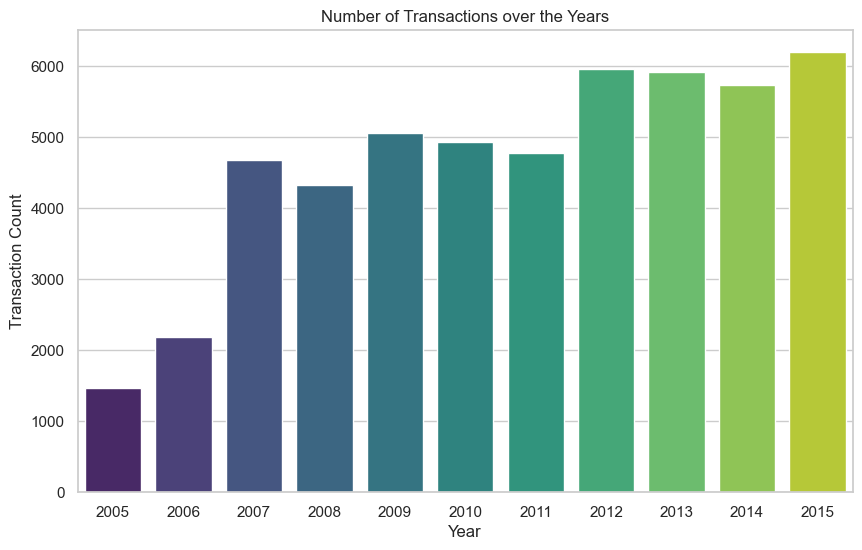

In [4]:
transactions_per_year = data.groupby('Year')['CustomerId'].count().reset_index()
transactions_per_year.rename(columns={'CustomerId': 'TransactionCount'}, inplace=True)

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='TransactionCount', data=transactions_per_year, palette="viridis")
plt.title('Number of Transactions over the Years')
plt.xlabel('Year')
plt.ylabel('Transaction Count')
plt.show()

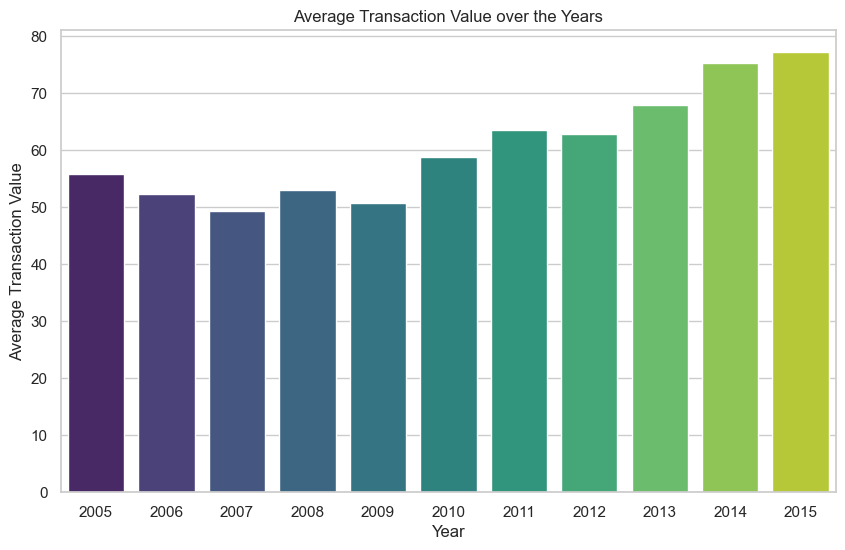

In [5]:
avgvalue_per_year = data.groupby('Year')['Value of Transaction'].mean().reset_index()
avgvalue_per_year.rename(columns={'Value of Transaction': 'Avg Transaction Value'}, inplace=True)

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Avg Transaction Value', data=avgvalue_per_year, palette="viridis")
plt.title('Average Transaction Value over the Years')
plt.xlabel('Year')
plt.ylabel('Average Transaction Value')
plt.show()

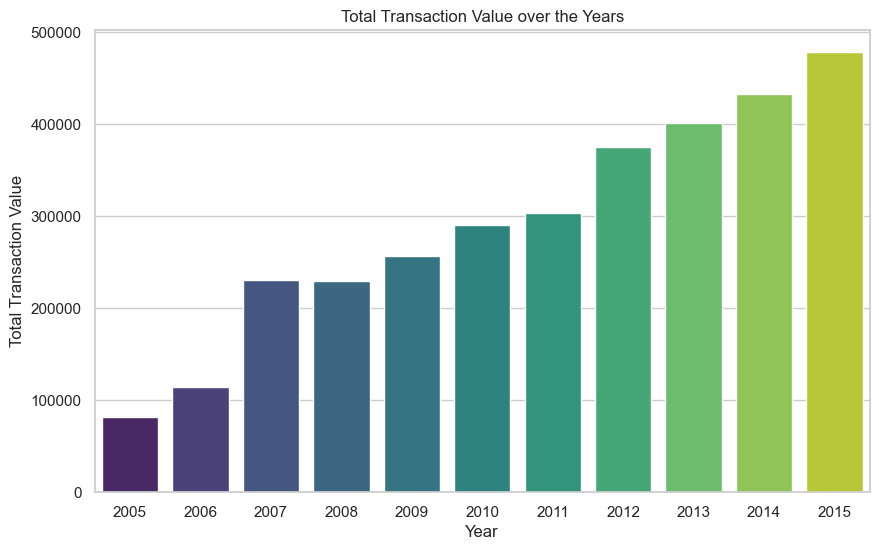

In [6]:
totalvalue_per_year = data.groupby('Year')['Value of Transaction'].sum().reset_index()
totalvalue_per_year.rename(columns={'Value of Transaction': 'Total Transaction Value'}, inplace=True)

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Total Transaction Value', data=totalvalue_per_year, palette="viridis")
plt.title('Total Transaction Value over the Years')
plt.xlabel('Year')
plt.ylabel('Total Transaction Value')
plt.show()

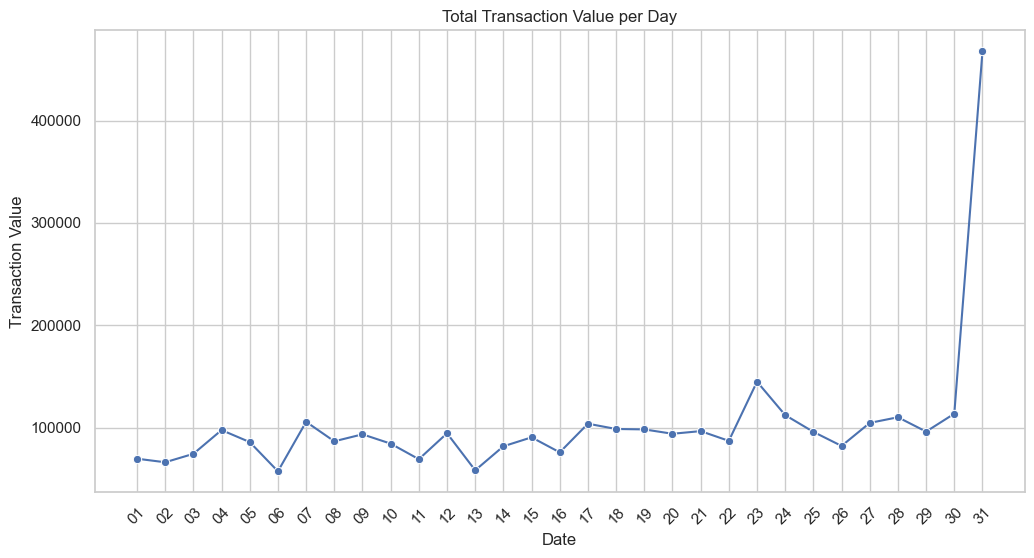

In [7]:
#data['Date'] = pd.to_datetime(data['Date'])
transactions_per_day = data.groupby('Date')['Value of Transaction'].sum().reset_index()

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Value of Transaction', data=transactions_per_day, marker='o')
plt.title('Total Transaction Value per Day')
plt.xlabel('Date')
plt.ylabel('Transaction Value')
plt.xticks(rotation=45)
plt.show()

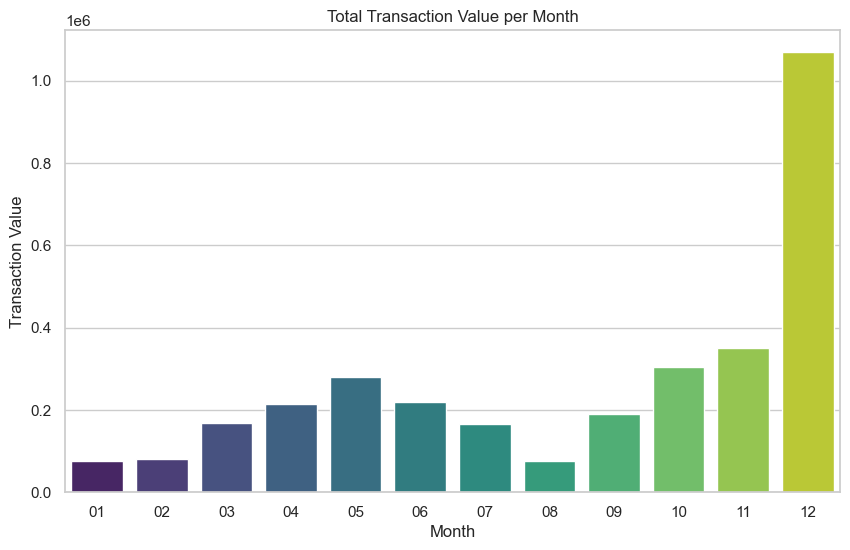

In [8]:
#data['Month'] = pd.to_datetime(data['Month'], format='%B').dt.month
transactions_per_month = data.groupby('Month')['Value of Transaction'].sum().reset_index()

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Value of Transaction', data=transactions_per_month, palette="viridis")
plt.title('Total Transaction Value per Month')
plt.xlabel('Month')
plt.ylabel('Transaction Value')
plt.show()

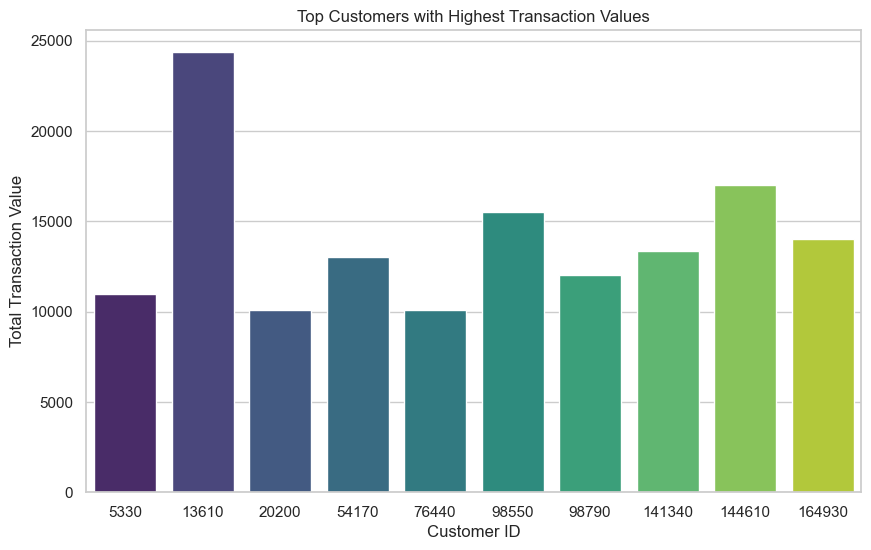

In [9]:
customer_transaction_total = data.groupby('CustomerId')['Value of Transaction'].sum().reset_index()
top_customers = customer_transaction_total.sort_values(by='Value of Transaction', ascending=False).head(10)

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='CustomerId', y='Value of Transaction', data=top_customers, palette="viridis")
plt.title('Top Customers with Highest Transaction Values')
plt.xlabel('Customer ID')
plt.ylabel('Total Transaction Value')
plt.show()

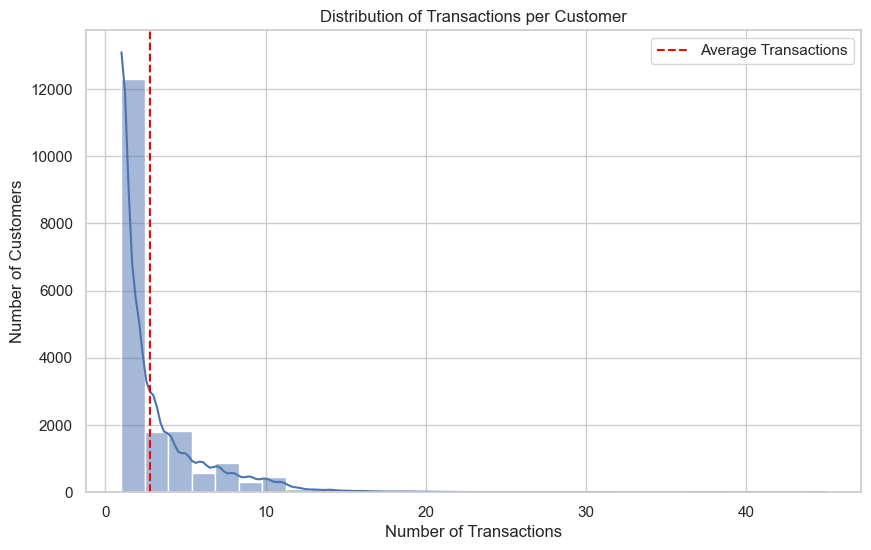

In [10]:
customer_transaction_count = data.groupby('CustomerId')['Value of Transaction'].count().reset_index()
average_transactions_per_customer = customer_transaction_count['Value of Transaction'].mean()

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data=customer_transaction_count, x='Value of Transaction', bins=30, kde=True)
plt.axvline(x=average_transactions_per_customer, color='red', linestyle='--', label='Average Transactions')
plt.title('Distribution of Transactions per Customer')
plt.xlabel('Number of Transactions')
plt.ylabel('Number of Customers')
plt.legend()
plt.show()

In [11]:
# data = data.sort_values(by='Date of Transaction')

# sns.set(style="whitegrid")
# plt.figure(figsize=(12, 6))
# sns.lineplot(x='Date of Transaction', y='Value of Transaction', data=data, legend='auto')
# plt.title('Transaction Values over Time')
# #plt.xlabel('Year')
# plt.ylabel('Transaction Value')
# #plt.xticks(rotation=45)
# plt.show()

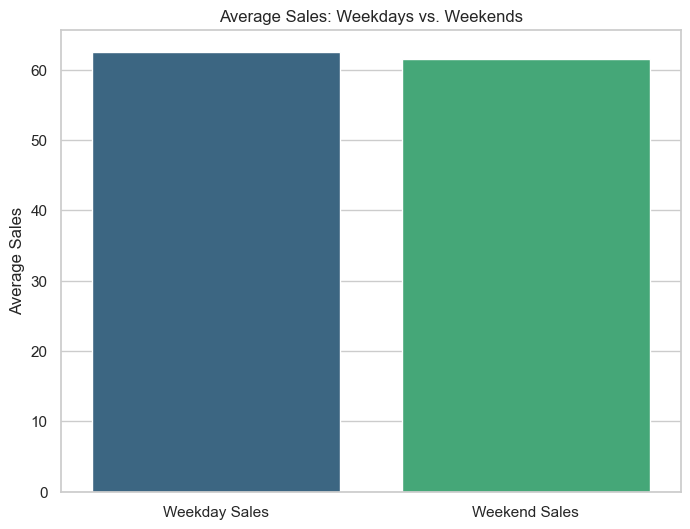

In [12]:
data['Date1'] = pd.to_datetime(data['Date of Transaction'], format='%Y-%m-%d')

# Extract the day of the week (0=Monday, 6=Sunday) from the "Date" column
data['DayOfWeek'] = data['Date1'].dt.dayofweek

# Group the data by day of the week and calculate the average sales for each group
weekday_sales = data[data['DayOfWeek'] < 5]['Value of Transaction'].mean()
weekend_sales = data[data['DayOfWeek'] >= 5]['Value of Transaction'].mean()

# Visualize the comparison using a bar plot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=['Weekday Sales', 'Weekend Sales'], y=[weekday_sales, weekend_sales], palette="viridis")
plt.title('Average Sales: Weekdays vs. Weekends')
plt.ylabel('Average Sales')
plt.show()

In [13]:
data.drop(['DayOfWeek', 'Date1'], axis = 1, inplace = True)
data.head()

,CustomerId,Value of Transaction,Date of Transaction,Date,Month,Year
0,760,25.0,2009-11-06,06,11,2009
1,860,50.0,2012-09-28,28,09,2012
2,1200,100.0,2005-10-25,25,10,2005
3,1420,50.0,2009-07-09,09,07,2009
4,1940,70.0,2013-01-25,25,01,2013


## RFM Analysis

In [14]:
data['Frequency'] = data.groupby('CustomerId')['Date'].transform('count')
data.head()

,CustomerId,Value of Transaction,Date of Transaction,Date,Month,Year,Frequency
0,760,25.0,2009-11-06,06,11,2009,5
1,860,50.0,2012-09-28,28,09,2012,10
2,1200,100.0,2005-10-25,25,10,2005,9
3,1420,50.0,2009-07-09,09,07,2009,34
4,1940,70.0,2013-01-25,25,01,2013,10


In [15]:
data_sorted_freq = data.sort_values(by='Frequency', ascending=False).head(10)
data_sorted_freq.reset_index(drop=True)

,CustomerId,Value of Transaction,Date of Transaction,Date,Month,Year,Frequency
0,9720,40.0,2015-10-31,31,10,2015,45
1,9720,30.0,2015-12-03,03,12,2015,45
2,9720,50.0,2012-07-05,05,07,2012,45
3,9720,30.0,2013-09-18,18,09,2013,45
4,9720,30.0,2011-06-29,29,06,2011,45
5,9720,50.0,2011-03-11,11,03,2011,45
6,9720,60.0,2008-12-31,31,12,2008,45
7,9720,50.0,2012-04-05,05,04,2012,45
8,9720,45.0,2014-03-26,26,03,2014,45
9,9720,45.0,2014-02-07,07,02,2014,45


In [16]:
data_sorted_rec = data.sort_values(by='Date of Transaction', ascending=False).head(10)
data_sorted_rec.reset_index(drop=True)

,CustomerId,Value of Transaction,Date of Transaction,Date,Month,Year,Frequency
0,168690,100.0,2015-12-31,31,12,2015,6
1,109480,60.0,2015-12-31,31,12,2015,7
2,215460,3000.0,2015-12-31,31,12,2015,3
3,138980,300.0,2015-12-31,31,12,2015,7
4,153110,30.0,2015-12-31,31,12,2015,6
5,212870,30.0,2015-12-31,31,12,2015,4
6,96580,20.0,2015-12-31,31,12,2015,8
7,234390,10.0,2015-12-31,31,12,2015,2
8,190130,100.0,2015-12-31,31,12,2015,4
9,48130,200.0,2015-12-31,31,12,2015,9


In [17]:
data['Date of Transaction'] = pd.to_datetime(data['Date of Transaction'], format='%Y-%m-%d')

In [18]:
import datetime as dt
NOW = dt.datetime(2023, 8, 3)

In [19]:
df = data.groupby('CustomerId').agg({'Date of Transaction': lambda x: (NOW - x.max()).days,
                                        'CustomerId': lambda x: len(x),
                                        'Value of Transaction': lambda x: x.sum()})

df['Date of Transaction'] = df['Date of Transaction'].astype(int)
df.rename(columns={'Date of Transaction': 'Recency',
                         'CustomerId': 'Frequency',
                         'Value of Transaction': 'Monetary Value'}, inplace=True)
df.reset_index(drop=False, inplace=True)
df

,CustomerId,Recency,Frequency,Monetary Value
0,10,6600,1,30.0
1,80,3114,7,500.0
2,90,3529,10,1158.0
3,120,4172,1,20.0
4,130,5741,2,100.0
...,...,...,...,...
18412,263820,2772,1,10.0
18413,263870,2906,1,50.0
18414,263880,2805,1,20.0
18415,263890,2776,1,54.0


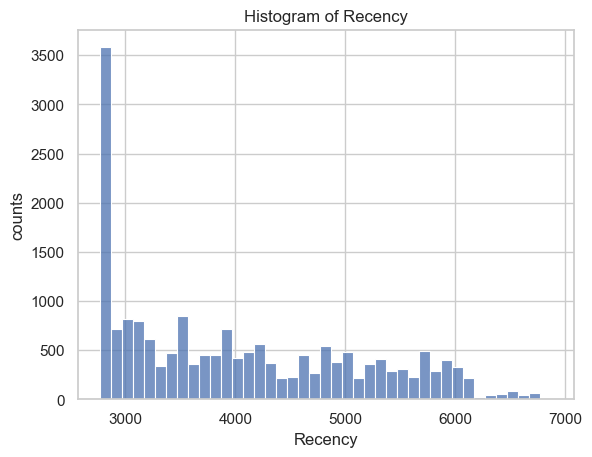

In [20]:
ax =sns.histplot(data = df, x= 'Recency', binwidth=100)
#ax.set_xlim(0,4000)
#ax.set_xticks([1000,2000,3000,4000])
ax.set(xlabel = 'Recency', ylabel = 'counts', title = 'Histogram of Recency')
plt.show()

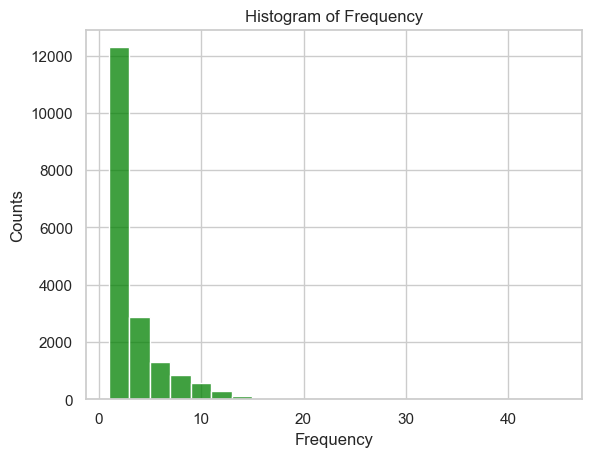

In [21]:
# Create the histogram plot with orange bars
ax = sns.histplot(data=df, x='Frequency', binwidth=2, color = 'green')

# Set the labels and title
ax.set(xlabel='Frequency', ylabel='Counts', title='Histogram of Frequency')

# Show the plot
plt.show()

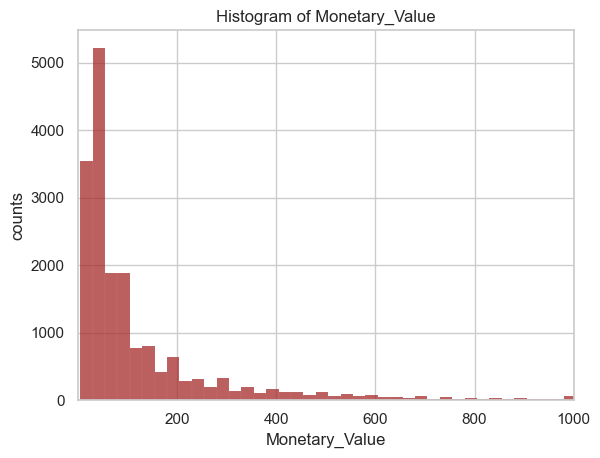

In [22]:
ax =sns.histplot(data = df, x= 'Monetary Value', binwidth=25, color = 'brown')
ax.set_xlim(0,1000)
ax.set_xticks([200,400,600,800, 1000])
ax.set(xlabel = 'Monetary_Value', ylabel = 'counts', title = 'Histogram of Monetary_Value')
plt.show()

In [23]:
percentiles = [ 0.33, 0.66]
recency_percentiles = df['Recency'].quantile(percentiles)
print(recency_percentiles[0.33])
print(recency_percentiles[0.66])

3186.0
4432.0


In [24]:
def R_Score(x):
    if x['Recency'] <= 3186:
        recency = 3
    elif x['Recency'] > 3186  and x['Recency'] <= 4432:
        recency = 2
    else:
        recency = 1
    return recency

df['R_Score'] = df.apply(R_Score, axis = 1)

In [25]:
percentiles = [0.33, 0.66]
Frequency_Percentile = df['Frequency'].quantile(percentiles)
print(Frequency_Percentile[0.33])
print(Frequency_Percentile[0.66])

1.0
2.0


In [26]:
def F_Score(x):
    if x['Frequency'] <= 1:
        frequency = 1
    elif x['Frequency'] > 1  and x['Frequency'] <= 2:
        frequency = 2
    else:
        frequency = 3
    return frequency

df['F_Score'] = df.apply(F_Score, axis = 1)

In [27]:
percentiles = [0.33, 0.66]
Monetary_Percentile = df['Monetary Value'].quantile(percentiles)
print(Monetary_Percentile[0.33])
print(Monetary_Percentile[0.66])

35.0
100.0


In [28]:
def M_Score(x):
    if x['Monetary Value'] <= 35:
        Monetary = 1
    elif x['Monetary Value'] > 35  and x['Monetary Value'] <= 100:
        Monetary = 2
    else:
        Monetary = 3
    return Monetary

df['M_Score'] = df.apply(M_Score, axis = 1)

In [29]:
df['RFMScore'] = df.R_Score.map(str) + df.F_Score.map(str) + df.M_Score.map(str)
df.head()

,CustomerId,Recency,Frequency,Monetary Value,R_Score,F_Score,M_Score,RFMScore
0,10,6600,1,30.0,1,1,1,111
1,80,3114,7,500.0,3,3,3,333
2,90,3529,10,1158.0,2,3,3,233
3,120,4172,1,20.0,2,1,1,211
4,130,5741,2,100.0,1,2,2,122


In [30]:
df['RFMScore'].value_counts()

333    3020
111    2729
211    2034
233    1263
112    1245
212    1136
311     874
122     853
222     693
312     656
322     536
133     523
332     506
232     425
132     317
323     287
121     260
223     222
123     200
221     143
213     131
313     131
113     112
321      51
231      27
331      24
131      19
Name: RFMScore, dtype: int64

In [31]:
df['F_Score'].value_counts()

1    9048
3    6124
2    3245
Name: F_Score, dtype: int64

In [32]:
df['R_Score'].value_counts()

1    6258
3    6085
2    6074
Name: R_Score, dtype: int64

In [33]:
df['M_Score'].value_counts()

2    6367
1    6161
3    5889
Name: M_Score, dtype: int64